In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
sys.path.append('d:/ariel2/code/core/')
sys.path.append('/kaggle/input/my-ariel2-library')
import kaggle_support as kgs
import ariel_model
import ariel_simple
import ariel_gp
import ariel_load
import ariel_load_FGS
import os
import numpy as np
import matplotlib.pyplot as plt
import importlib
import copy
from tqdm import tqdm
kgs.debugging_mode = 1
#kgs.n_workers = 4

local


In [2]:
importlib.reload(ariel_load)
importlib.reload(ariel_load_FGS)
train_data = kgs.load_all_train_data()
train_data = train_data[:1]
todo = dict()

model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
model.model.run_in_parallel = True
todo['Baseline GP'] = model

model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
model.model.run_in_parallel = True
loaders = model.model.starter_model.loaders
#loaders[0].apply_wavelength_binning = ariel_load_FGS.ApplyWavelengthBinningFGS2()
#loaders[0].apply_wavelength_binning.n_mean_pixels = 0
#loaders[0].apply_pixel_corrections.mask_hot = False
# loaders[0].apply_full_sensor_corrections.inpainting_2d = True
# loaders[0].apply_full_sensor_corrections.restore_invalids = True
# loaders[0].apply_full_sensor_corrections.remove_background_based_on_pixels = True
#loaders[1].apply_full_sensor_corrections.inpainting_wavelength = False
#loaders[1].apply_pixel_corrections.mask_hot = False
#loaders[1].apply_full_sensor_corrections.use_pca_for_background_removal = False
#loaders[1].apply_full_sensor_corrections.remove_background_based_on_rows = False
#loaders[1].apply_full_sensor_corrections.remove_background_remove_used_rows = False
#loaders[1].apply_wavelength_binning = ariel_load.ApplyWavelengthBinningAIRS2()
# #loaders[1].apply_wavelength_binning.residual_threshold = np.inf
# model.model.model_options.FGS_order = 3
# model.model.model_options.AIRS_order_time = 3
# model.model.model_options.AIRS_order_wavelength = 3
todo['All + poly33'] = model

kgs.sanity_checks_active = True
for k,v in todo.items():
    print(k)
    model = copy.deepcopy(v)
    model = model.model
    model.starter_model.loaders[0].cache_steps = []
    model.run_in_parallel = True

    model.train(train_data)
    dat = copy.deepcopy(train_data)+copy.deepcopy(train_data)
    print('hi')
    dat[0].load_to_step(5,model.starter_model.loaders)
    print('hi')
    dat[1].load_to_step(5,model.starter_model.loaders)
    inferred_data = model.infer(dat)
    print(k)
    score = kgs.score_metric(inferred_data[:1], train_data)[0]
    print(score)
    #inferred_data = model.infer(train_data)
    print(k)
    score = kgs.score_metric(inferred_data[1:], train_data)[0]
    print(score)

Baseline GP
hi
hi


Processing in parallel: 100%|█████████████████████████████████████████████████████████████| 2/2 [00:14<00:00,  7.43s/it]


local
SpawnPoolWorker-1 1
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-2 2
CUDA_VISIBLE_DEVICES= 0
Baseline GP
Score:           -0.0138
RMS error FGS:   36.13 ppm
mRMS error FGS:  36.13 ppm
RMS error AIRS:  34.81 ppm
mRMS error AIRS: 34.81 ppm
-0.013814327483238131
Baseline GP
Score:           -0.0138
RMS error FGS:   36.13 ppm
mRMS error FGS:  36.13 ppm
RMS error AIRS:  34.81 ppm
mRMS error AIRS: 34.81 ppm
-0.013814327483238131
All + poly33
hi
hi


Processing in parallel: 100%|█████████████████████████████████████████████████████████████| 2/2 [00:15<00:00,  7.61s/it]


local
SpawnPoolWorker-6 6
CUDA_VISIBLE_DEVICES= 0
All + poly33
Score:           -0.0138
RMS error FGS:   36.13 ppm
mRMS error FGS:  36.13 ppm
RMS error AIRS:  34.81 ppm
mRMS error AIRS: 34.81 ppm
-0.013814327483238131
All + poly33
Score:           -0.0138
RMS error FGS:   36.13 ppm
mRMS error FGS:  36.13 ppm
RMS error AIRS:  34.81 ppm
mRMS error AIRS: 34.81 ppm
-0.013814327483238131


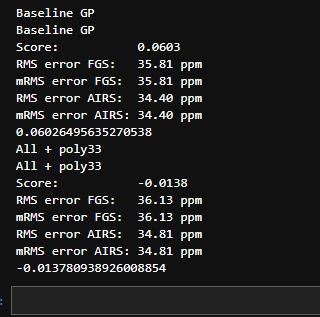

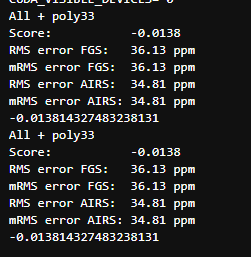